<h1> Introduction to Regression </h1> 

<p> We all are familiar with the classic Linear Regression problem from our <b> university labs</b> </p>
<img src="images/linear_regression.png" alt="linear regression" width="500" height="500">

<h2> House Price Prediction </h2>

<p> Suppose we want to develop a software that get a house area and predict the house price </p>
<img src="images/house_price_prediction.jpg" alt="house price prediction" width="500" height="250">

<img src="images/houseprice_model.png" alt="house price prediction model" width="500" height="250">

<h3>Data Gathering</h3>

<p> First of all we search over the real states of the neighbourhood and take notes of all available cases area and suggested price. </p>

<img src="images/data_gathering.png" alt="data gathering" width="750" height="400">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("darkgrid")

np.random.seed(24)
x = np.random.randint(30, high=150, size=100, dtype=int)
y = 25 * x + 15
noise = np.random.normal(0, 400, size=100)
y_noisy = np.clip((y + noise).astype(int), 200, None)
dataset = np.array([x, y_noisy]).T
dataset_df = pd.DataFrame(dataset, columns=["area", "price"])
dataset_df.head(20)

,area,price
0,64,1557
1,33,200
2,94,2958
3,117,2801
4,47,1002
5,47,2093
6,31,200
7,130,3860
8,109,3467
9,34,737


Text(0, 0.5, 'Price ($)')

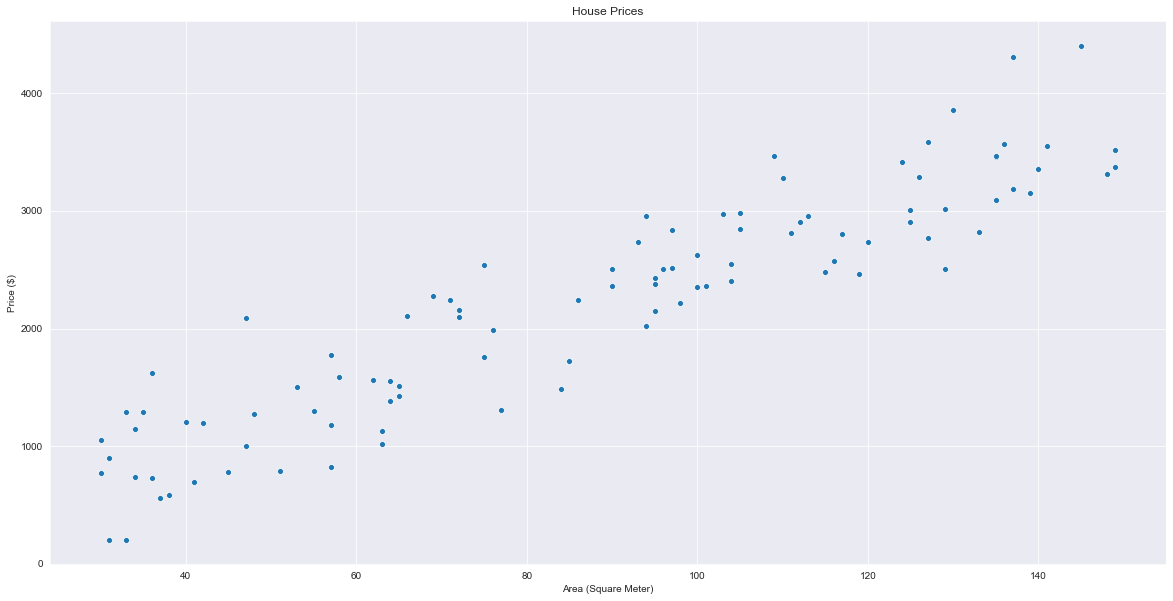

In [2]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")

<h4> These pairs are our <b>DATASET (OBSERVATION)</b>, the area variable is the <b> input </b> of the problem and the price variable is  <b>output or label</b> </h4>

<h2> Choosing Model </h2>

<p> Based on the above plot we can observe that a <b> line </b> can fit to the data properly (not a polynomial or sinusoid)</p>

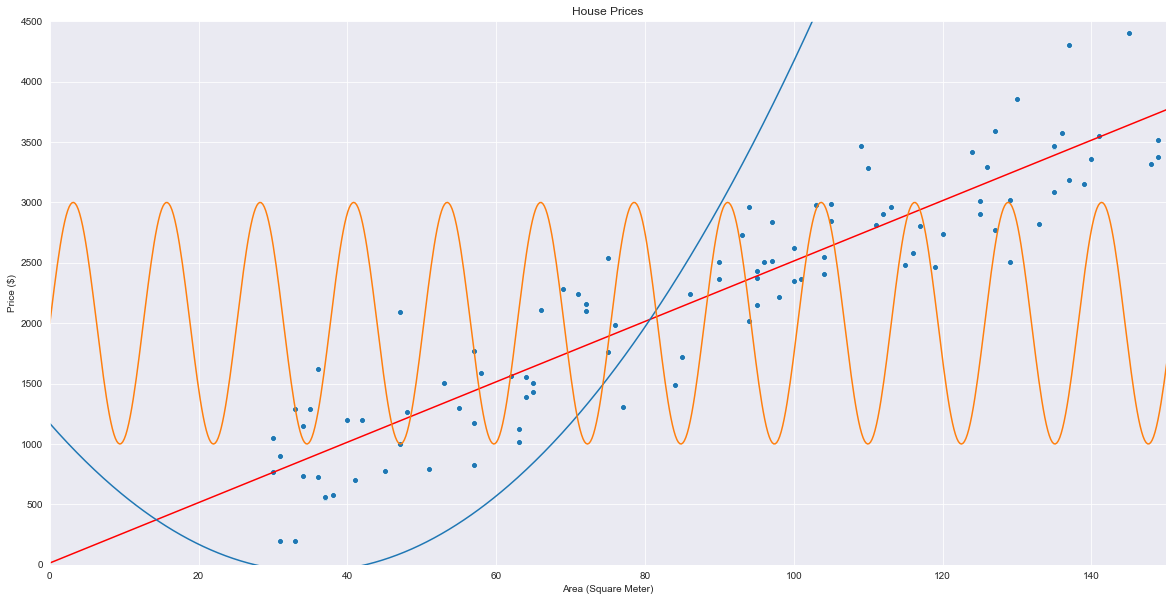

In [3]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")
x_plot = np.linspace(0, 200, 1000)
y_plot_lin = 25  * x_plot + 15
plt.plot(x_plot, y_plot_lin, color="r")
y_plot_pol = 1 * (x_plot - 40) ** 2 + 10  * (x_plot - 40) -30
plt.plot(x_plot, y_plot_pol)
y_plot_sin = 1000 * np.sin(x_plot/2) + 2000
plt.plot(x_plot, y_plot_sin)
plt.ylim(0, 4500)
plt.xlim(0, 150)
plt.show()

<h2> Which line? </h2>

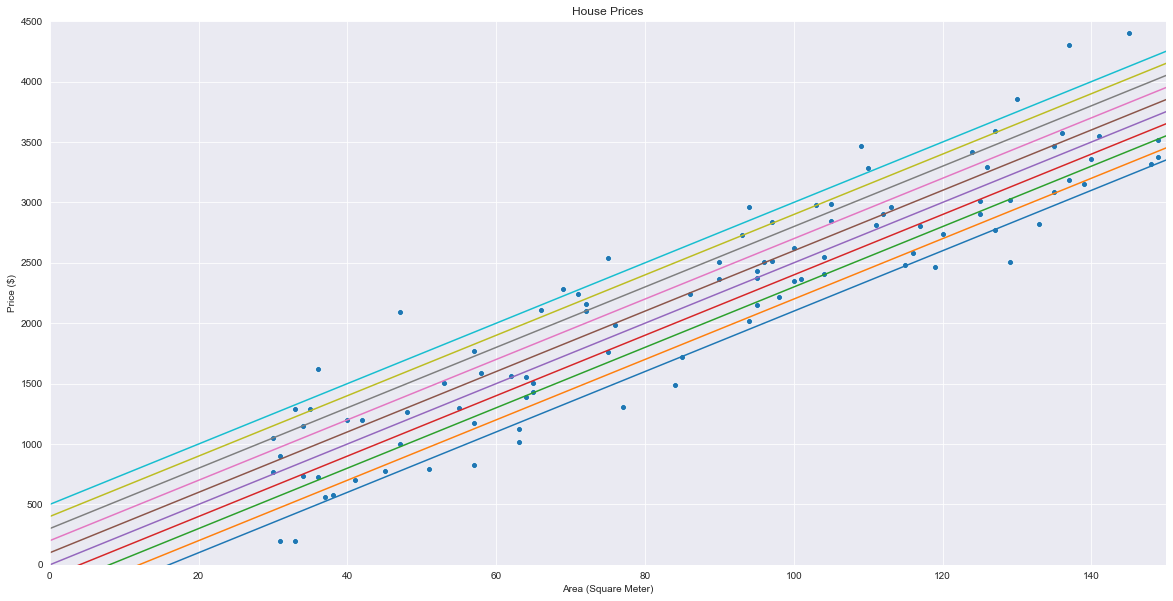

In [4]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")
x_plot = np.linspace(0, 200, 1000)
b = -400
for i in range (10):
    y_plot = 25  * x_plot + b
    b += 100
    plt.plot(x_plot, y_plot)
plt.ylim(0, 4500)
plt.xlim(0, 150)
plt.show()

<h2> Training (Model Fitting)</h2>

<h3> How we represent a line </h3>

$$
y = a_1x + a_2 
$$

So if we could determine the best $a_1$ and $a_2$ which can represent the dataset charactristics we could say we solved the problem

<h4> However what do we mean by <b>Best</b>?</p>

$$
(x^{(1)}, y^{(1)}_{true})  \rightarrow y^{(1)}_{predict} = a_1x^{(1)} + a_2  \\
(x^{(2)}, y^{(2)}_{true}) \rightarrow y^{(2)}_{predict} = a_1x^{(2)} + a_2 \\
(x^{(3)}, y^{(3)}_{true}) \rightarrow y^{(3)}_{predict} = a_1x^{(3)} + a_2\\
(x^{(4)}, y^{(4)}_{true}) \rightarrow y^{(4)}_{predict} = a_1x^{(4)} + a_2 \\
(x^{(5)}, y^{(5)}_{true}) \rightarrow y^{(5)}_{predict} = a_1x^{(5)} + a_2\\
\vdots
$$

The best model is the model which its output $y_{predict}$ is very close to the actual output $y_{true}$
$$
|y_{predict}^{(n)} - y_{true}^{(n)}|
$$


<img src="images/linear_regression_error.png" alt="linear regression error" width="500" height="500">

<p> However we should have a metric for <b>all</b> data points not just one.</p>
<h4> We can average of errors for all data points:</h4>
$$
\frac{1}{N}(|y_{predict}^{(1)} - y_{true}^{(1)}| + |y_{predict}^{(2)} - y_{true}^{(2)}| +...+ |y_{predict}^{(N)} - y_{true}^{(N)}|)
$$
<p> In machine learning and statistics we call this metric <b>Mean Absolute Error (MAE)</b>:</p>

$$
MAE = \frac{1}{N}\sum_{i=1}^{N} |y_{predict}^{(i)} - y_{true}^{(i)}| \\
MAE = \frac{1}{N}\sum_{i=1}^{N} |a_1x^{(i)} + a_2 - y_{true}^{(i)}|
$$

<p> So if we come back to our question which was how to choose the best line, we can now answer it:</p>
<p> The best line (best $a_1$ and $a_2$) is one which minimize the $MAE$ function </p>

$$
a^*_1, a^*_2 = \underset{a_1, a_2}{\mathrm{argmin}}\frac{1}{N}\sum_{i=1}^{N} |a_1x^{(i)} + a_2 - y_{true}^{(i)}|
$$

<p> This is an <b>Optimization Problem</b> and we can solve it with optimization techniques such as <b>gradient descent</b></p>
<p> In this case the MAE function is the <b> loss or cost function</b></p>
<p> Another common loss function in regression problem is <b>Mean Squared Error (MSE)</b> function:</p>
$$
a^*_1, a^*_2 = \underset{a_1, a_2}{\mathrm{argmin}}\frac{1}{N}\sum_{i=1}^{N} (a_1x^{(i)} + a_2 - y_{true}^{(i)})^2
$$
<p> We will talk about these tachniques soon, but first let's solve our problem with <b>scikit learn</b> library.</p>

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = dataset_df["area"].values.reshape(-1,1)
Y = dataset_df["price"].values.reshape(-1,1)
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

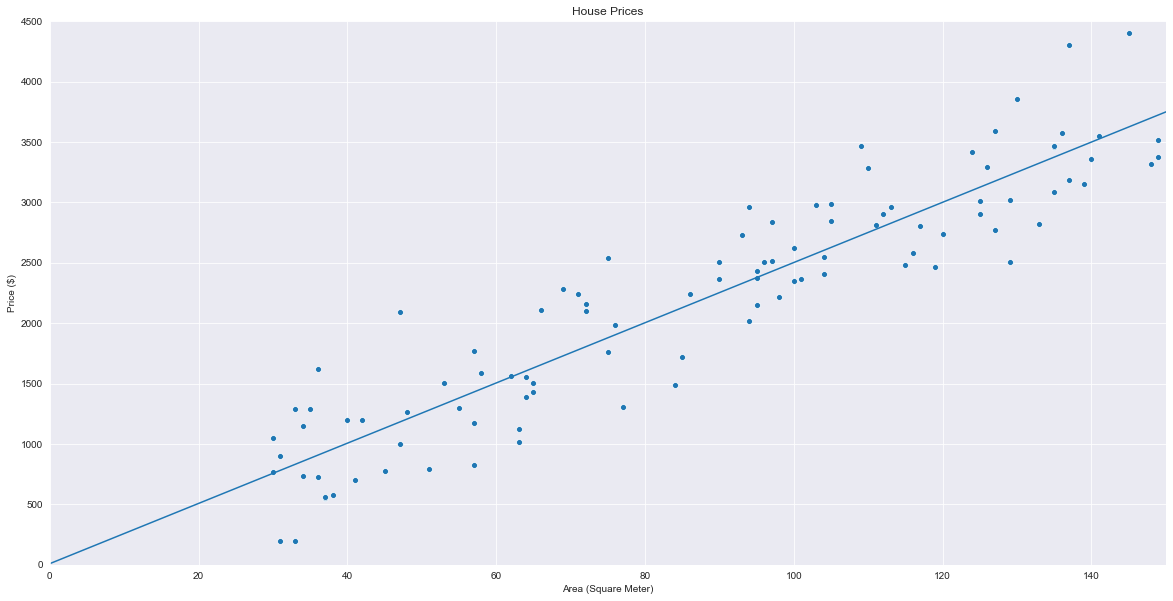

In [6]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")
x_plot = np.linspace(0, 200, 1000).reshape(-1,1)
y_pred = model.predict(x_plot)
plt.plot(x_plot, y_pred)
plt.ylim(0, 4500)
plt.xlim(0, 150)
plt.show()

<h3>Let's have a recap of what have we done till now</h3>

<img src="images/overview.png" alt="ML overview" width="500" height="500">

<h2>Multi Feature Linear Regression</h2>

<p> up until now our dataset had just one feature (input). Suppose that the realtor of your neighbourhood provide the <b>balcony</b> size too</p>
<p>Now you have two features to estimate the house price</p>

1. House Area
2. Balcony Size

In [7]:
area = np.random.randint(30, high=150, size=100, dtype=int)
balcony = (.05 * area + np.random.normal(0, 20, size=100)).astype(int)
balcony = np.clip(balcony, 0, None)
y = 25 * area + 10 * balcony + 15
noise = np.random.normal(0, 400, size=100)
y_noisy = np.clip((y + noise).astype(int), 200, None)
dataset = np.array([area, balcony, y_noisy]).T
dataset_df = pd.DataFrame(dataset, columns=["area", "balcony", "price"])
dataset_df.head(20)

,area,balcony,price
0,40,26,1814
1,147,17,3494
2,147,7,3524
3,139,1,3303
4,99,0,3145
5,39,0,901
6,41,40,1989
7,137,7,2387
8,43,3,756
9,61,21,2644


Text(0, 0.5, 'Balcony size (Square Meter)')

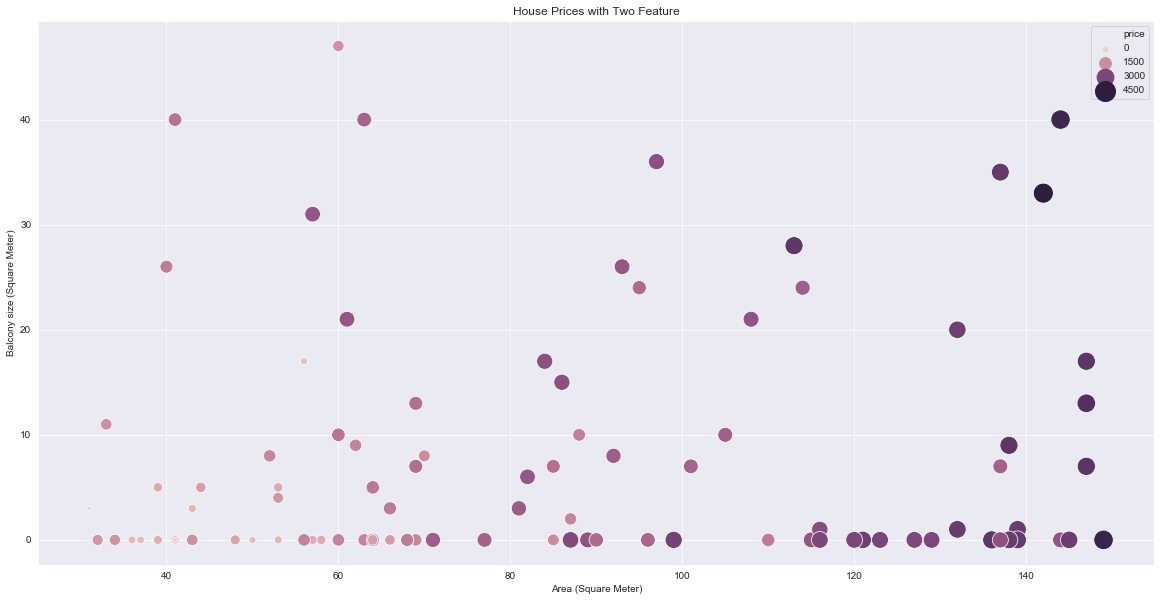

In [8]:
plt.figure(figsize=(20,10))
plt.title("House Prices with Two Feature")
sns.scatterplot(data=dataset_df,x="area", y="balcony", hue="price", size="price", sizes=(20, 400))
plt.xlabel("Area (Square Meter)")
plt.ylabel("Balcony size (Square Meter)")
# plt.ylim(0, 20)

Text(0.5, 0, 'Price ($)')

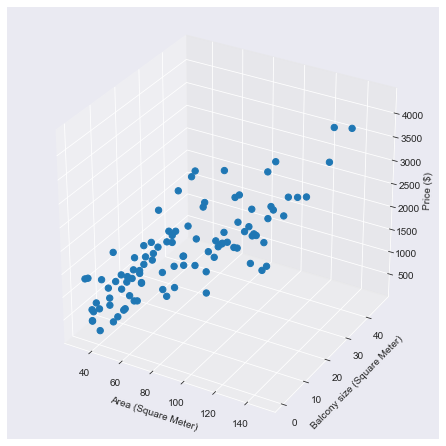

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(dataset_df["area"].values, dataset_df["balcony"].values, dataset_df["price"].values, s=40, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel("Area (Square Meter)")
ax.set_ylabel("Balcony size (Square Meter)")
ax.set_zlabel("Price ($)")

<p>Based on these figures we can see that we can fit a <b>plane</b> on this dataset</p>
<p>How we represent a plane in 3D space?</p>

$$
y = a_1x_1 + a_2x_2 + a_3
$$

<p>As we can see this is exactly like the line representation in 2D space with one extra term</p>
<p> So in general for a $n$ dimensional space we can represent a <b>hyper plane</b> as follows:</p>

$$
y = a_1x_1 + a_2x_2 + a_3x_3 + a_4x_4 + ... + a_nx_n + a_{n+1}
$$

<p>In general if you have $n$ feature and you want to apply linear regression for the output variable you can minimize one of the following loss funcitons:</p>

$$
MAE = \frac{1}{N}\sum_{i=1}^{N} |(a_1x_1^{(i)} + a_2x_2^{(i)} + ... + a_nx_n^{(i)} + a_{n+1}) - y_{true}^{(i)}| \\
MSE = \frac{1}{N}\sum_{i=1}^{N} ((a_1x_1^{(i)} + a_2x_2^{(i)} + ... + a_nx_n^{(i)} + a_{n+1}) - y_{true}^{(i)})^2
$$

<img src="images/two_variable_regression.png" alt="Two Variable Regression" width="500" height="500">

<h4> Let's Write Some Codes</h4>

In [11]:
model = LinearRegression()
X = dataset_df[["area","balcony"]].values
Y = dataset_df["price"].values.reshape(-1,1)
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
a_1,a_2 = model.coef_.squeeze()
a_3 = model.intercept_[0]

In [37]:
x_1 = np.linspace(0, 200, 1000)
x_2 = np.linspace(0, 40, 1000)
X_1, X_2 = np.meshgrid(x_1, x_2)
Y = a_1 * X_1 + a_2 * X_2 + a_3

Text(0.5, 0, 'Price ($)')

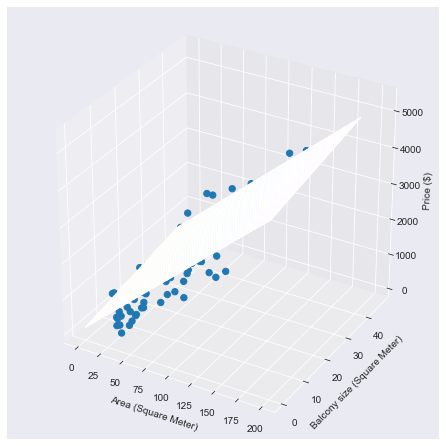

In [53]:
from matplotlib import cm
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(dataset_df["area"].values, dataset_df["balcony"].values, dataset_df["price"].values, s=40, marker='o', cmap=cmap, alpha=1)
ax.plot_surface(X_1, X_2, Y, alpha=0.9, cmap=cmap)
ax.set_xlabel("Area (Square Meter)")
ax.set_ylabel("Balcony size (Square Meter)")
ax.set_zlabel("Price ($)") 

<h2>Polynomial Regression</h2>

<p>Up until now we just discussed modeling data with linear characteristics, but what if the data has some higher order charactristics?</p>

Suppose you gathered another neighbourhood data which just have area feature:

In [63]:
np.random.seed(24)
x = np.random.randint(30, high=150, size=100, dtype=int)
y = 1 * x ** 2 + 5 * x + 15
noise = np.random.normal(0, 400, size=100)
y_noisy = np.clip((y + noise).astype(int), 200, None)
dataset = np.array([x, y_noisy]).T
dataset_df = pd.DataFrame(dataset, columns=["area", "price"])
dataset_df.head(20)

,area,price
0,64,4373
1,33,371
2,94,9914
3,117,14150
4,47,2271
5,47,3362
6,31,236
7,130,18160
8,109,13168
9,34,1213


Text(0, 0.5, 'Price ($)')

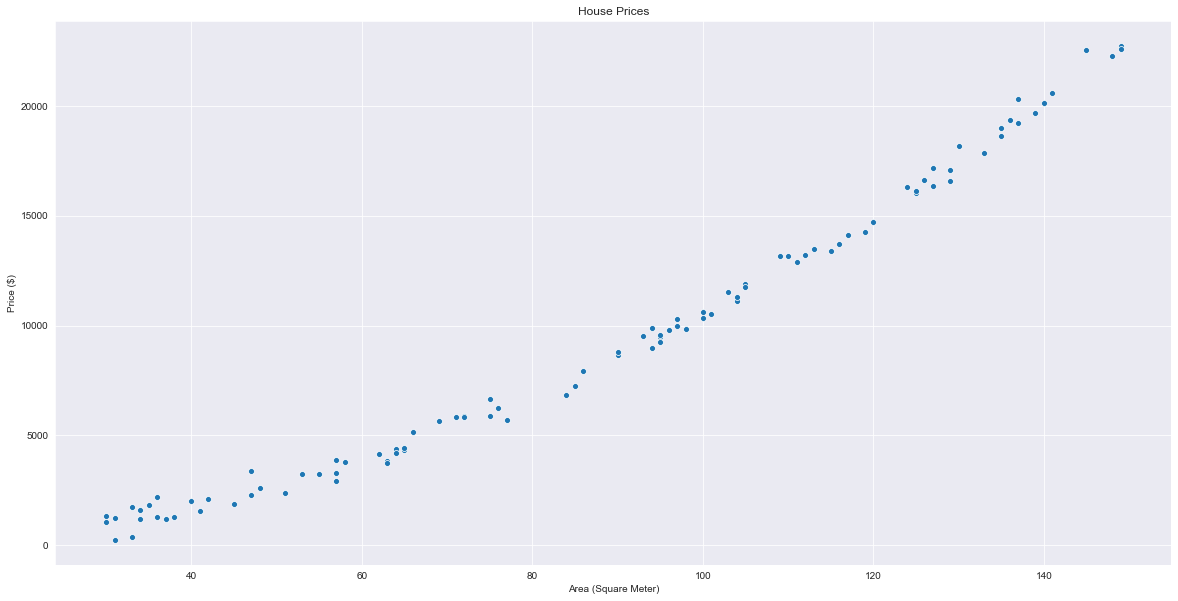

In [64]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")

As you can see in contrast with previous examples, this data does not have linear charactristics and it seems it is a second order polynomial, so we should fit a polynomial instead of a linear function:

$$
y = a_1x^2 + a_2x + a_3
$$

<h3> Can we transform this problem to a Linear Regression problem?</h3>

let's recall the two feature linear regression formulation:
$$
y = a_1x_1 + a_2x_2 + a_3
$$

It is obvious that if we create some artificial variables we can transform our single feature polynomial regression problem to a two feature linear regression:
$$
x_1 = x^2\\
x_2 = x
$$

In [67]:
dataset_df["area_squared"] = dataset_df["area"] ** 2
dataset_df = dataset_df[["area_squared", "area", "price"]]
dataset_df.head(10)

,area_squared,area,price
0,4096,64,4373
1,1089,33,371
2,8836,94,9914
3,13689,117,14150
4,2209,47,2271
5,2209,47,3362
6,961,31,236
7,16900,130,18160
8,11881,109,13168
9,1156,34,1213


In [68]:
model = LinearRegression()
X = dataset_df[["area_squared","area"]].values
Y = dataset_df["price"].values.reshape(-1,1)
model.fit(X,Y)
a_1,a_2 = model.coef_.squeeze()
a_3 = model.intercept_[0]

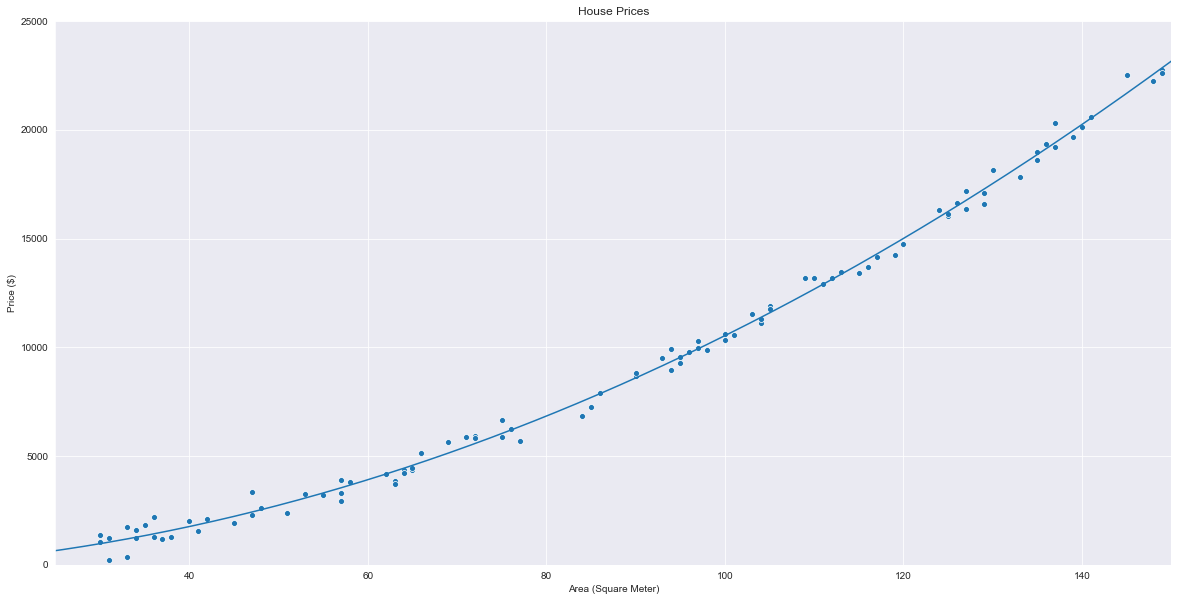

In [77]:
plt.figure(figsize=(20,10))
plt.title("House Prices")
sns.scatterplot(data=dataset_df,x="area", y="price")
plt.xlabel("Area (Square Meter)")
plt.ylabel("Price ($)")
x_plot = np.linspace(0, 200, 1000).reshape(-1,1)
y_pred = a_1 * x_plot ** 2 + a_2 * x_plot + a_3
plt.plot(x_plot, y_pred)
plt.ylim(0, 25000)
plt.xlim(25, 150)
plt.show()

<h4> So we can transform any polynomial regression problem to a Multi Feature Linear Regression</h4>

<h2> Model Evaluation </h2>

<p> After expanding the linear regression idea from a single feature problem to multi feature problem, let's get back to the only block of ML project pipeline that we didn't talk about yet:</p>
<h4> How we can decide whether a model is better that other one?</h4>

<img src="images/overview.png" alt="ML overview" width="500" height="500">